In [2]:
# neural network classification with pytorch
# Make classification data
import sklearn
from sklearn.datasets import make_circles

In [3]:
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)


In [4]:
len(y)

1000

In [5]:
print(X[:5]) 
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [6]:
# make a dataframe with pandas
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

In [7]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
# visualize
import matplotlib.pyplot as plt

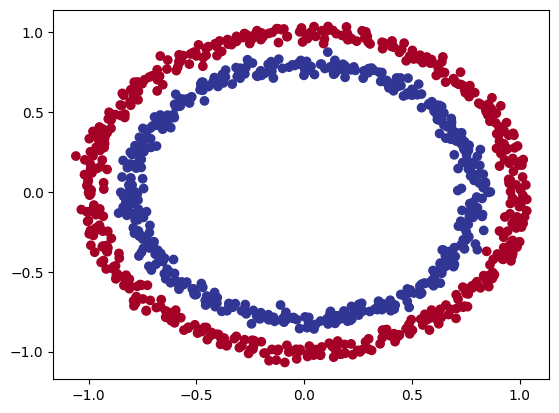

In [9]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


turn data into tensors and creates train and test splits

In [10]:
import torch

In [11]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
X[:5]
y[:5]

tensor([1., 1., 1., 1., 0.])

In [13]:
torch.manual_seed(42)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
len(X_train)

800

# build the model
lets classify the model to classify blue and red dots

1. setup device agonistic Code

2. construct a model (by subclassing nn.module)

3. define a loss function and optimizer

4. create a training and test loop



In [16]:
import torch
from torch import nn

construct a model
 1. subclass nn.module
 2. create nn.Linear() capable of handling the shapes of our data
 3. defines a forward() method that outlines the forward pass of the model
 4. instantiate an instance of our model class and send it to the target device

In [17]:
# construct a model that subclasses nn.Module
class CircleModel1(nn.Module):
    def __init__(self):
        super().__init__()
        # create 2 nn.linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

        
    # define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
    
# instantiate an instance of our model class and send it to the target device
model = CircleModel1()

In [18]:
model

CircleModel1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [19]:
# replicate the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

In [20]:
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [21]:
# setup loss function nad optimizer

# sigmoid activation function built in
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(params=model.parameters(), lr= 0.1)

In [22]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) 
    return acc


#  Going from raw logits -> prediction probabilities -> prediction labels 

our model outputs are going to be raw logits

we can convert these logits into prediction probabilities by passing them to some kind of activation function
(e.g sigmoid for binary classification and soft max for multiclass classification)

then we can convert our model's pediction probabilities to pediction labels by either rounding them or taking the argmax()


# building a training and test loop

In [23]:
# train the model
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model.train()

    # forward pass
    y_logit = model(X_train).squeeze()
    # turn logits to pred probs to pred labels
    y_pred = torch.round(torch.sigmoid(y_logit))
        
    # calculate the loss
    loss = loss_fn(y_logit, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimize step
    optimizer.step()

    ### TESTING  
    model.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # calculate the tesr loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Accuracy {acc:.2f}%| Test loss: {test_loss} | Test acc: {test_acc:.2f}%")

    
    

Epoch: 0 | Loss: 0.6948843598365784 | Accuracy 0.51%| Test loss: 0.6941587328910828 | Test acc: 0.53%
Epoch: 10 | Loss: 0.6940247416496277 | Accuracy 0.50%| Test loss: 0.6943526268005371 | Test acc: 0.49%
Epoch: 20 | Loss: 0.6936814188957214 | Accuracy 0.50%| Test loss: 0.6944985389709473 | Test acc: 0.47%
Epoch: 30 | Loss: 0.6935059428215027 | Accuracy 0.50%| Test loss: 0.6945440769195557 | Test acc: 0.47%
Epoch: 40 | Loss: 0.6933965086936951 | Accuracy 0.50%| Test loss: 0.6945280432701111 | Test acc: 0.46%
Epoch: 50 | Loss: 0.6933196783065796 | Accuracy 0.49%| Test loss: 0.694485604763031 | Test acc: 0.46%
Epoch: 60 | Loss: 0.6932621598243713 | Accuracy 0.50%| Test loss: 0.6944378018379211 | Test acc: 0.45%
Epoch: 70 | Loss: 0.693217396736145 | Accuracy 0.49%| Test loss: 0.6943947076797485 | Test acc: 0.45%
Epoch: 80 | Loss: 0.6931816339492798 | Accuracy 0.49%| Test loss: 0.6943604350090027 | Test acc: 0.43%
Epoch: 90 | Loss: 0.6931523084640503 | Accuracy 0.48%| Test loss: 0.69433587

# make predictions and evaluate the model
lets make some predictions and make them visual

In [24]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("it already exists")

else:
    print("downloading helper_functions.py")
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)



it already exists


In [25]:
from helper_functions import plot_predictions, plot_decision_boundary

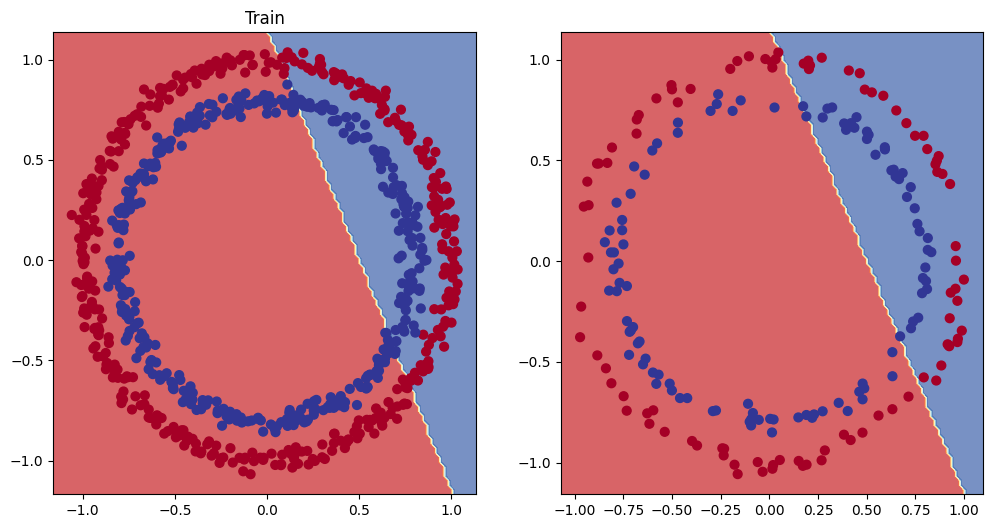

In [26]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model, X_test, y_test)


In [27]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [28]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


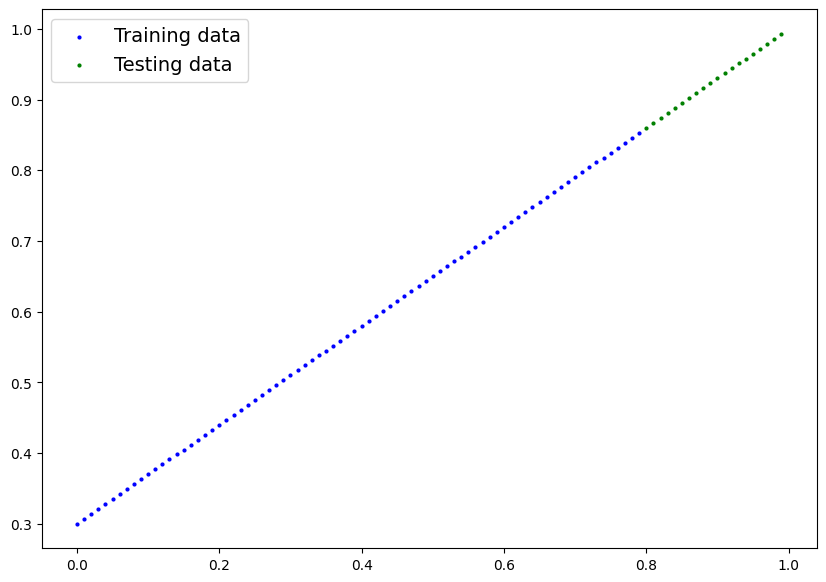

In [29]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
)

In [30]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [32]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1500

# Put data to target device
X_train_regression, y_train_regression = X_train_regression, y_train_regression
X_test_regression, y_test_regression = X_test_regression, y_test_regression

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.90731, Test loss: 1.17454
Epoch: 100 | Train loss: 0.04869, Test loss: 0.11245
Epoch: 200 | Train loss: 0.01112, Test loss: 0.04682
Epoch: 300 | Train loss: 0.01491, Test loss: 0.04859
Epoch: 400 | Train loss: 0.01658, Test loss: 0.04947
Epoch: 500 | Train loss: 0.01564, Test loss: 0.04750
Epoch: 600 | Train loss: 0.01548, Test loss: 0.04653
Epoch: 700 | Train loss: 0.01505, Test loss: 0.04672
Epoch: 800 | Train loss: 0.01458, Test loss: 0.04584
Epoch: 900 | Train loss: 0.01485, Test loss: 0.04452
Epoch: 1000 | Train loss: 0.01406, Test loss: 0.04223
Epoch: 1100 | Train loss: 0.01334, Test loss: 0.04166
Epoch: 1200 | Train loss: 0.01369, Test loss: 0.04203
Epoch: 1300 | Train loss: 0.01384, Test loss: 0.04206
Epoch: 1400 | Train loss: 0.01353, Test loss: 0.04108


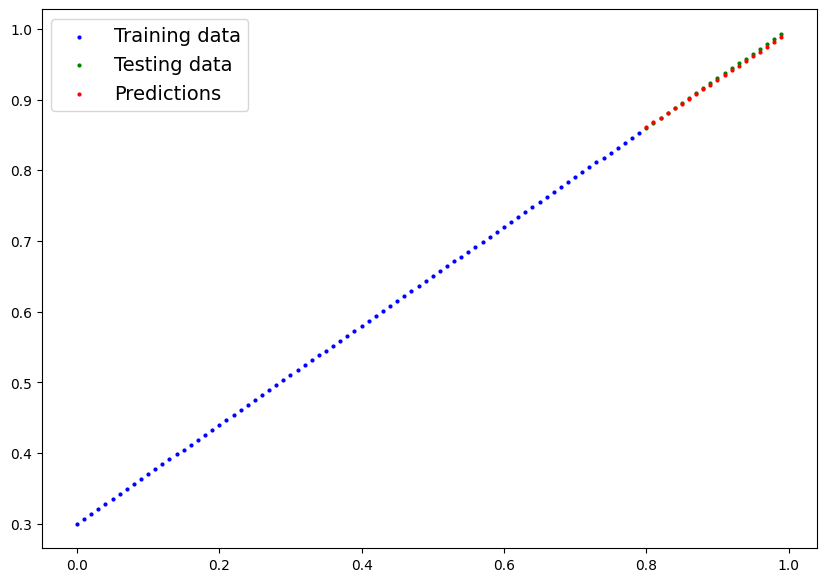

In [33]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

what patterns could you draw if you were given an infinite amount of a straight and non straigt line

#  Recreating non linear data

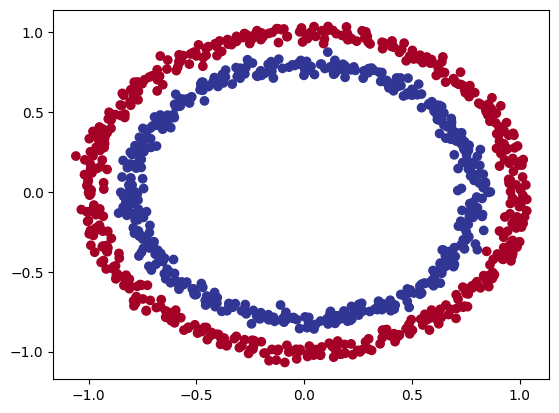

In [34]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [35]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# building a model with non-linearity

In [36]:
from torch import nn
class CircleModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # place non-linear activation function in between layer
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))    
    


In [37]:
model1 = CircleModel2()
print(model1)    

CircleModel2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [38]:
y_train.shape

torch.Size([800])

In [39]:
y_test.shape

torch.Size([200])

In [40]:
y_train = y_train.unsqueeze(1).float()

In [41]:
y_test = y_test.unsqueeze(1)

In [42]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model1.parameters(),
                            lr=0.1)

In [43]:
torch.manual_seed(42)

# loop through the data

epochs = 1000

for epoch in range(epochs):
    model1.train()

    # forward pass
    y_logits = model1(X_train)
    # logits to prediction probabilities to prediction labels
    y_pred = torch.round(torch.sigmoid(y_logits)) 

    # ca;culate the loss
    # takes logits as first input
    loss1 = loss_fn(y_logits, y_train).squeeze()
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss1.backward()

    # optimizer step
    optimizer.step()

    # TESTING
    model1.eval()
    with torch.inference_mode():
        test_logits = model1(X_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss1} | Acc: {acc:.2%} | Test loss: {test_loss}| Test acc: {test_acc:.2%}")    



Epoch: 0 | Loss: 0.6930208802223206 | Acc: 49.38% | Test loss: 0.6929304599761963| Test acc: 52.50%


Epoch: 100 | Loss: 0.6909536719322205 | Acc: 52.12% | Test loss: 0.6921688318252563| Test acc: 48.00%
Epoch: 200 | Loss: 0.6895278692245483 | Acc: 52.88% | Test loss: 0.6906116604804993| Test acc: 49.00%
Epoch: 300 | Loss: 0.6876247525215149 | Acc: 52.38% | Test loss: 0.6885719895362854| Test acc: 50.00%
Epoch: 400 | Loss: 0.6847612261772156 | Acc: 52.62% | Test loss: 0.6852326989173889| Test acc: 52.00%
Epoch: 500 | Loss: 0.6807937622070312 | Acc: 52.88% | Test loss: 0.6803784370422363| Test acc: 53.50%
Epoch: 600 | Loss: 0.6747784614562988 | Acc: 53.37% | Test loss: 0.6732730865478516| Test acc: 55.00%
Epoch: 700 | Loss: 0.6650022864341736 | Acc: 54.75% | Test loss: 0.6627616286277771| Test acc: 57.50%
Epoch: 800 | Loss: 0.6499472856521606 | Acc: 66.00% | Test loss: 0.6469348073005676| Test acc: 68.00%
Epoch: 900 | Loss: 0.6206498146057129 | Acc: 75.88% | Test loss: 0.6194617748260498| Test acc: 77.50%


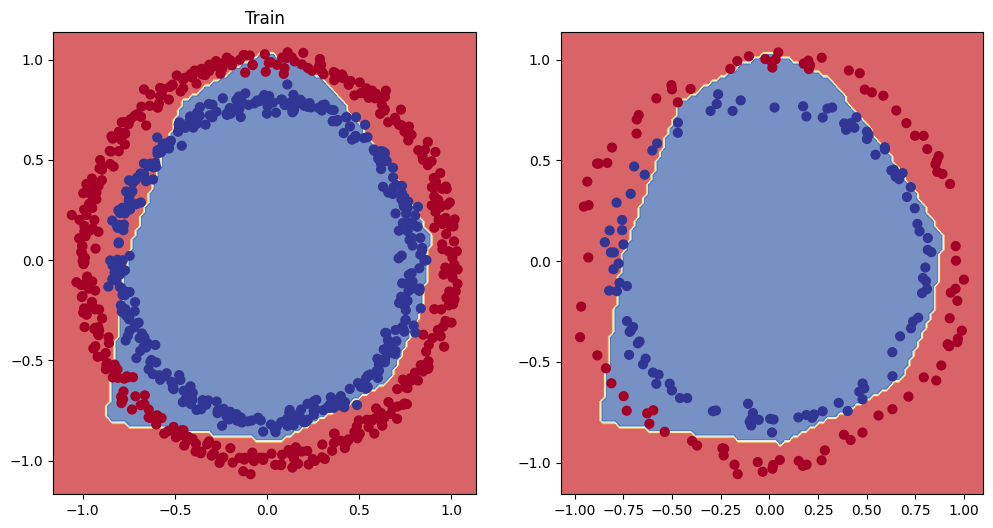

In [44]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model1, X_test, y_test)


In [45]:
model1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model1(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 tensor([[1.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.]]))

# Creating a toy multi-class dataset

In [46]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split 

In [47]:
# set up hyperparameters
CLASSES_NO = 4
FEATURES_NO = 2
RANDOM_SEED = 42

In [48]:
# CREATE MULTICLASS DATA
X_blob, y_blob = make_blobs(n_samples=1000, n_features=FEATURES_NO,
                            centers=CLASSES_NO,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

In [49]:
# turn data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# spli into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob,test_size=0.2, random_state=RANDOM_SEED)

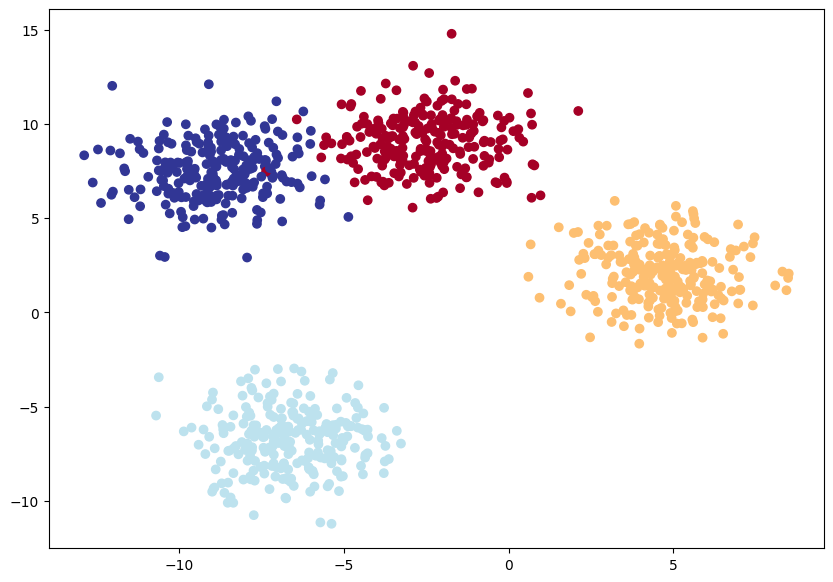

In [50]:
# plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [51]:
# building a multiclass classification with Pytorch

In [ ]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=10):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=input_features, out_features=output_features)
            
        )

In [53]:
X_blob_train.shape

torch.Size([800, 2])